In [9]:
#Setup
import sys
import os
import pandas as pd
import numpy as np

# Add the deployment directory to path
deployment_dir = os.path.abspath(os.path.join(os.getcwd(), '../src/deployment'))
sys.path.append(deployment_dir)

# Corrected imports
from model_deployment_0169 import ModelDeployment
from inference_pipeline_0169 import InferencePipeline

print("Day 3: Deployment Infrastructure")
print("Member 0169 - Model Evaluation & Deployment")

Day 3: Deployment Infrastructure
Member 0169 - Model Evaluation & Deployment


In [10]:
#Test Model Deployment
# Initialize deployment system
deployment = ModelDeployment('../models')

print("Testing model deployment system...")

# Try to load models (they may not exist yet)
models_loaded = deployment.load_all_models()
print(f"Models loaded: {models_loaded}")

# Load preprocessors
preprocessors_loaded = deployment.load_preprocessors()
print(f"Preprocessors loaded: {preprocessors_loaded}")

# Get system info
model_info = deployment.get_model_info()
print("\nSystem Info:")
print(model_info)

INFO:model_deployment_0169:Loaded 0 models successfully


Testing model deployment system...
Models loaded: 0
Preprocessors loaded: 0

System Info:
{'loaded_models': 0, 'loaded_preprocessors': 0, 'models': {}}


In [11]:
# Test Inference Pipeline
# Initialize inference pipeline
pipeline = InferencePipeline('../models')
init_result = pipeline.initialize()

print("Inference Pipeline Initialization:")
print(init_result)

# Test prediction (may fail if no models are loaded)
test_statement = "The economy is performing better than expected this quarter."

print(f"\nTesting prediction with: '{test_statement}'")
result = pipeline.predict(test_statement, speaker="Test Speaker", use_ensemble=True)

print("Prediction Result:")
print(result)

INFO:inference_pipeline_0169:Initializing inference pipeline...
INFO:model_deployment_0169:Loaded 0 models successfully
INFO:inference_pipeline_0169:Loaded 0 models and 0 preprocessors
INFO:inference_pipeline_0169:Health check status: healthy


Inference Pipeline Initialization:
{'models_loaded': 0, 'preprocessors_loaded': 0, 'health_status': 'healthy'}

Testing prediction with: 'The economy is performing better than expected this quarter.'
Prediction Result:
{'error': 'No models loaded', 'performance': {'response_time': 0.0, 'timestamp': 1755422934.8994744}}


In [12]:
#Performance Testing
# Test batch predictions
test_statements = [
    {"statement": "The unemployment rate has decreased by 5%", "speaker": "Politician A"},
    {"statement": "Climate change is not real", "speaker": "Politician B"},
    {"statement": "Healthcare costs have increased significantly", "speaker": "Expert C"},
    {"statement": "The new policy will benefit everyone", "speaker": "Official D"},
    {"statement": "Crime rates are at an all-time low", "speaker": "Police Chief"}
]

print("Testing batch prediction...")
batch_results = pipeline.batch_predict(test_statements)

print(f"Processed {len(batch_results)} statements")
for i, result in enumerate(batch_results):
    print(f"Statement {i+1}: {result.get('prediction', 'Error')} "
          f"(Confidence: {result.get('confidence', 0):.3f})")

INFO:inference_pipeline_0169:Processing batch of 5 statements


Testing batch prediction...
Processed 5 statements
Statement 1: Error (Confidence: 0.000)
Statement 2: Error (Confidence: 0.000)
Statement 3: Error (Confidence: 0.000)
Statement 4: Error (Confidence: 0.000)
Statement 5: Error (Confidence: 0.000)


Performance Statistics:
Total Predictions: 6
Success Rate: 0.000
Average Response Time: 0.000s

System Health: healthy


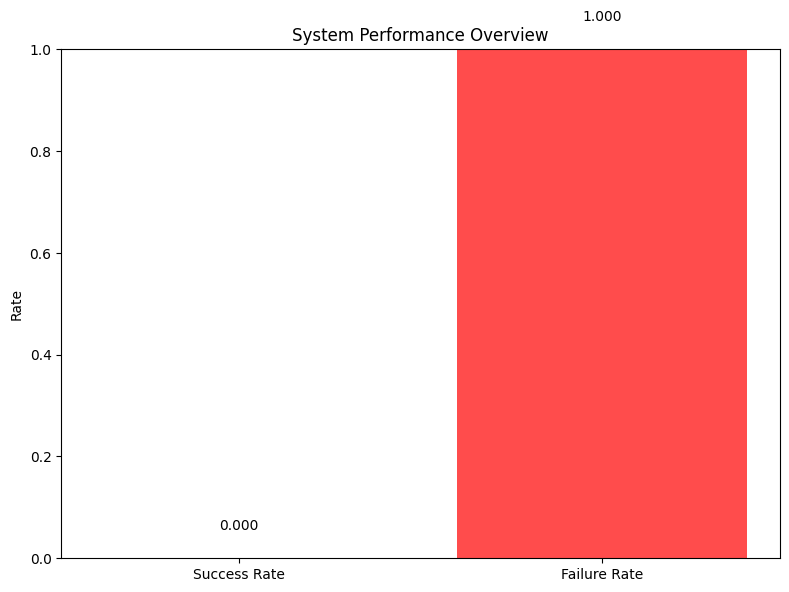

In [13]:
# Performance Monitoring
# Get performance statistics
stats = pipeline.get_performance_stats()

print("Performance Statistics:")
print(f"Total Predictions: {stats['total_predictions']}")
print(f"Success Rate: {stats['success_rate']:.3f}")
print(f"Average Response Time: {stats['average_response_time']:.3f}s")

# Health check
health = pipeline.deployment.health_check()
print(f"\nSystem Health: {health['status']}")

# Visualize performance if we have data
if stats['total_predictions'] > 0:
    import matplotlib.pyplot as plt
    
    # Create simple performance visualization
    metrics = ['Success Rate', 'Failure Rate']
    values = [stats['success_rate'], stats['failure_rate']]
    
    plt.figure(figsize=(8, 6))
    plt.bar(metrics, values, color=['green', 'red'], alpha=0.7)
    plt.title('System Performance Overview')
    plt.ylabel('Rate')
    plt.ylim(0, 1)
    
    for i, v in enumerate(values):
        plt.text(i, v + 0.05, f'{v:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('../results/plots/performance_overview_day3.png', dpi=300, bbox_inches='tight')
    plt.show()